Задача 4
Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса.

In [3]:
import random
import numpy as np
x=[[0,0.12],[1,0.3],[2,0.167],[3,0.24],[4,0.31],[5,0.54],[6,0.111],[7,0.02],[8,0.001],[9,0.2]]
x.sort(key=lambda x: x[1])
x_=np.array(x)
x_[:,1]/=np.sum(x_[:,1])
x_

array([[8.00000000e+00, 4.97760080e-04],
       [7.00000000e+00, 9.95520159e-03],
       [6.00000000e+00, 5.52513688e-02],
       [0.00000000e+00, 5.97312096e-02],
       [2.00000000e+00, 8.31259333e-02],
       [9.00000000e+00, 9.95520159e-02],
       [3.00000000e+00, 1.19462419e-01],
       [1.00000000e+00, 1.49328024e-01],
       [4.00000000e+00, 1.54305625e-01],
       [5.00000000e+00, 2.68790443e-01]])

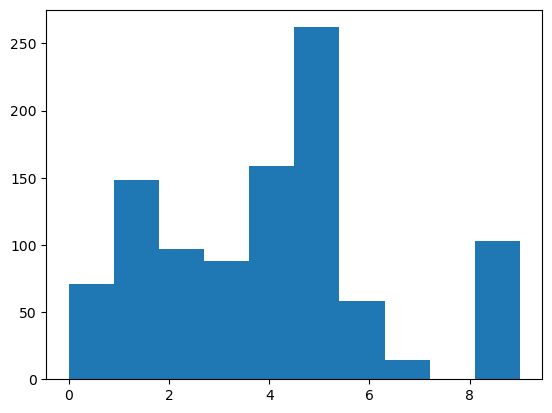

In [4]:
from scipy import stats
import matplotlib.pyplot as plt
plt.hist( stats.rv_discrete(name='custm', values=(x_[:,0], x_[:,1])).rvs(size=1000))
plt.show()

Задача 5
Смоделируйте выборку размера 1000 из распределения  Exp(λ)  с помощью метода Inverse transform. Постройте выборочную гистограмму и точный график плотности распределения.

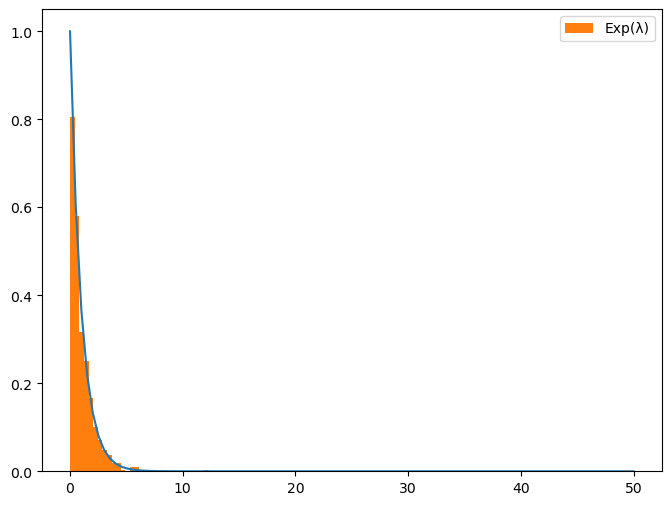

In [5]:
def exp(lambda_=1):
    u=np.random.rand(1000)
    return -1/lambda_ *np.log(u)

x=np.linspace(0,50,100)
y=np.exp(-x) #можно указать параметр лямбда, тогда lmbd*np.exp(-lmbd*x)


plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.hist(exp(), bins=30, density=True, label="Exp(λ)")
plt.legend()
plt.show()

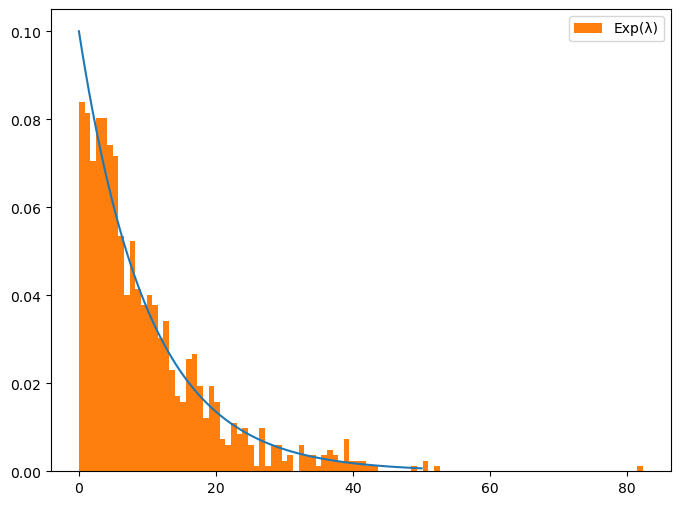

In [6]:
def exp(lambda_=1):
    u=np.random.rand(1000)
    return -1/lambda_ *np.log(u)

x=np.linspace(0,50,100)
y=0.1*np.exp(-0.1*x) #можно указать параметр лямбда, тогда lmbd*np.exp(-lmbd*x)


plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.hist(exp(0.1), bins=100, density=True, label="Exp(λ)")
plt.legend()
plt.show()

Задача 6
Обоснуйте (устно), что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из распределения с плотностью  excos2x  на отрезке  [−π/2,π/2] . По выборке постройте график выборочной гистограммы и сравните его с графиком точной функции плотности.

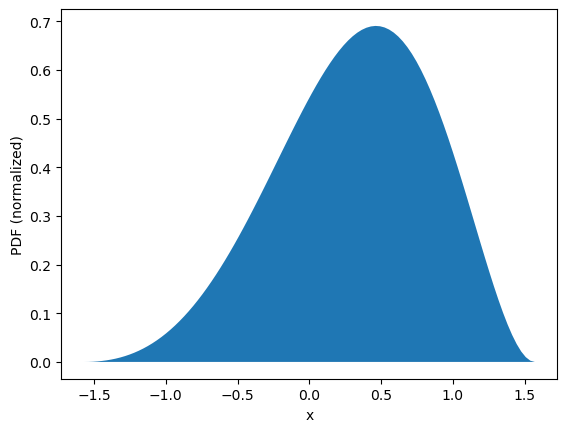

In [7]:
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

x = np.linspace(-np.pi/2, np.pi/2, 100)
density = np.exp(x)*np.cos(x)**2 # not normalized density!
norm=np.trapz(density, x)
plt.fill_between(x, 0, density/norm)
plt.ylabel('PDF (normalized)')
plt.xlabel('x')
plt.show()

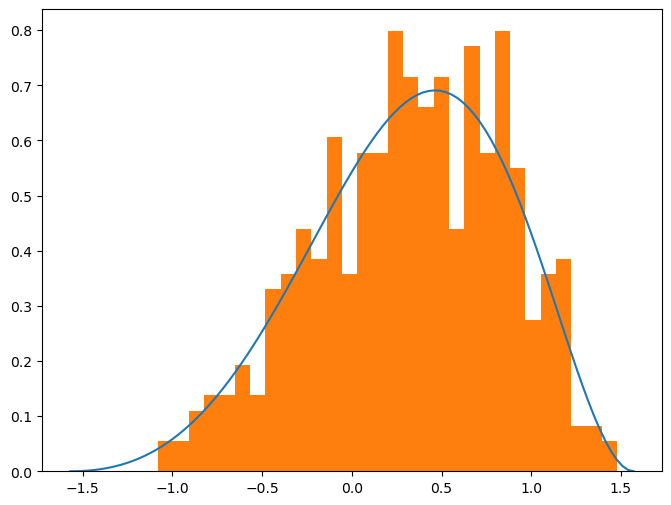

In [8]:
x = np.linspace(-np.pi/2, np.pi/2, 100)
norm=np.trapz(np.exp(x)*np.cos(x)**2, x)
def density(t):
    return np.exp(t)*np.cos(t)**2/norm

n = 1000
x_ = np.random.uniform(-np.pi/2, np.pi/2,n)  #get uniform temporary x values
y_ = np.random.uniform(0,0.75,n)  # get uniform random y values

mask = y_<density(x_)

y=density(x) #можно указать параметр лямбда, тогда lmbd*np.exp(-lmbd*x)


plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.hist(x_[mask], bins=30, density=True)
plt.show()

Задача 7
Смоделировать и изобразить выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

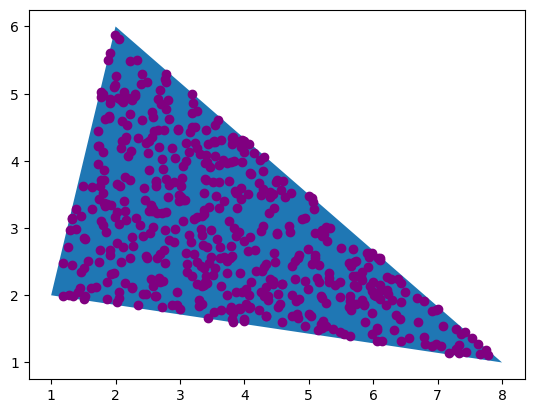

In [39]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
#polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]))
S=5*np.sqrt(34)/2
n = 1000
y_ = np.random.uniform(0, 2*S,n)  #get uniform y values
x_ = np.random.uniform(0,1,n)  # get uniform x values
a=np.array(np.concatenate([x_,y_]))
index=np.array(np.vectorize(lambda i: a[i+n]<-2*S*(a[i]-1))((np.arange(0,n))).nonzero()).reshape(-1)
a11=7
a12=1/(2*S)
a21=-1
a22=2/S
b1=1
b2=2
x_new=a[index]*a11+a[index+n]*a12+b1
y_new=a[index]*a21+a[index+n]*a22+b2
polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]))
plt.gca().add_collection(PatchCollection([polygon]))
plt.scatter(x_new,y_new,color='purple')
plt.show()


Задача 8 Смоделировать без использования метода отбора выборку из 500 точек равномерно распределенных внутри единичного круга. Изобразите полученные точки. Они действительно равномерно заполняют круг?

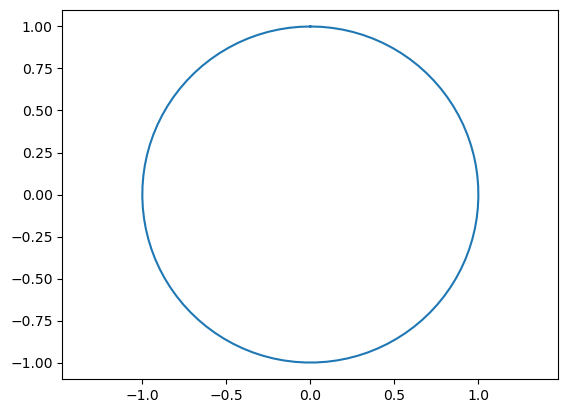

In [40]:
%matplotlib inline
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()


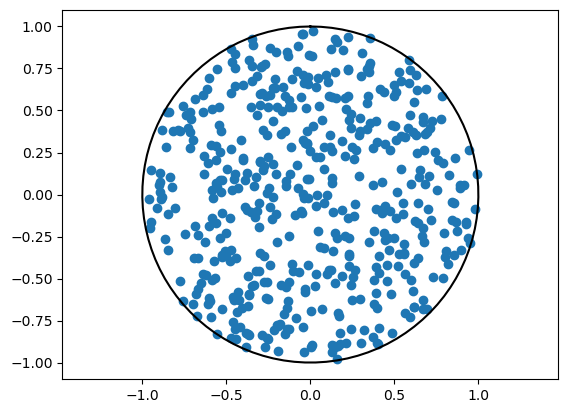

In [41]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t), color = 'black')
plt.axis('equal')

phi = np.random.uniform(0,1,500) * 2 * np.pi
r = np.sqrt(np.random.uniform(0,1,500))
x=r * np.cos(phi)
y=r * np.sin(phi)
plt.scatter(x,y)
plt.show()

Задача 9
Докажите (устно), что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним [4, 7] и ковариационной матрицей [[20, -4], [ -4, 40]]. Постройте 2D гистограмму полученного распределения. Сравните выборочное среднее и ковариационную матрицу с точными значениями.

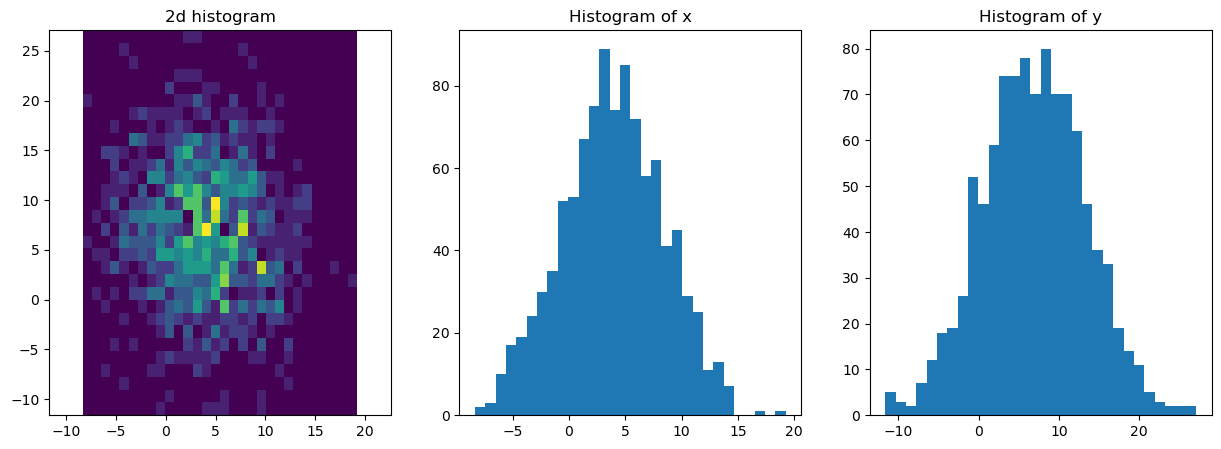

[3.91846687 6.88413978]
[[20.05110226 -2.78422778]
 [-2.78422778 40.60511263]]


In [94]:
mean = np.array([4, 7])
covar = np.array([[20, -4], [-4, 40]])

n = 1000
a = np.zeros((2, n))
for i in range(n):
    while True:
        x, y = 2 * np.random.rand(2) - 1
        r = x**2 + y**2
        if 0 < r < 1:
            break
    factor = np.sqrt(-2 * np.log(r) / r)
    a[:, i] = np.array([x, y]) * factor

# Преобразование для двумерного гауссовского распределения
a_new = np.dot(np.linalg.cholesky(covar), a) + mean[:, np.newaxis]


fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(a_new[0], a_new[1], bins=30)
ax[0].axis('equal')
ax[1].hist(a_new[0], bins=30)
ax[2].hist(a_new[1], bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

# Вычисление выборочного среднего и ковариационной матрицы
a_mean = np.mean(a_new, axis=1)
a_covar = np.cov(a_new)
print(a_mean)
print(a_covar)